# Домашнее задание к модулю "Введение в машинное обучение"

### 1. Для начала импортируем стандартные библиотеки и настроим matplotlib:

In [1]:
from matplotlib import pyplot as plt
import pandas as pd

%matplotlib inline

### 2. Загрузим датасет и выделим из него целевую функцию:

In [2]:
data = pd.read_csv('credit_homework.csv', index_col='id')
target = data['Вернул кредит']
del(data['Вернул кредит'])

### 3. Выделим часть данных для контроля качества модели. 
Для этого мы воспользуемся функцией train_test_split из библиотеки sklearn

Документация:
http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

Подробно функция будет разобрана в следующих модулях нашего курса.

Параметр random_state не обязателен, он нужен чтобы у всех студентов функция отработала одинаковым образом.

In [3]:
from sklearn.model_selection import train_test_split

train_data, control_data, train_target, control_target =\
                        train_test_split(data, target, random_state=31337)

### 4. Обучим дерево принятия решений.

Параметр max_depth определяет максимальную высоту дерева принятия решений. 

Параметр random_state, который передается при создании дерева не обязателен, он нужен для того чтобы у всех студентов дерево получилось одинаковым.

In [4]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=3, random_state=31337)
model.fit(train_data, train_target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False,
            random_state=31337, splitter='best')

### 5. Отрисуем обученное дерево принятия решений. 

Для этого нам понадобится модуль plot_tree.py, который вы можете скачать со страницы домашнего задания. Убедитесь, что данный файл лежит в той же папке, что и данный ноутбук.


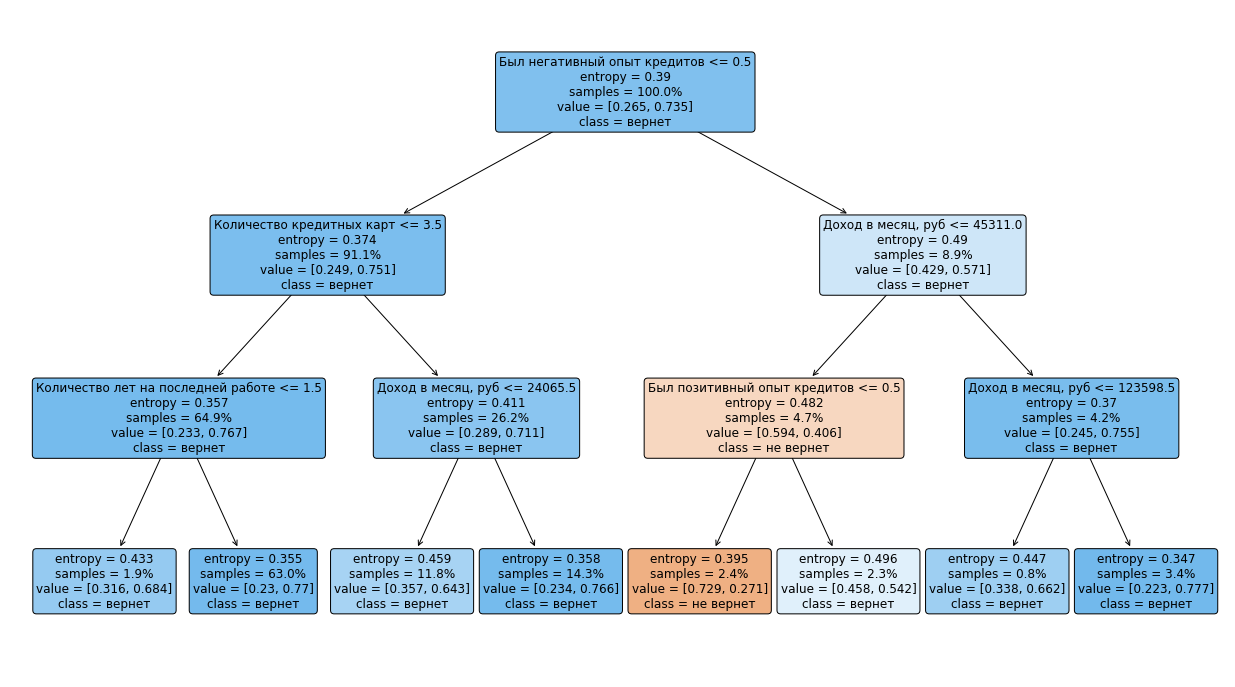

In [5]:
from plot_tree import plot_tree
plot_tree(model, feature_names=data.columns, class_names=['не вернет', 'вернет'])

### 6. Оценим качество работы нашей модели. 
Для этого предскажем, вернет ли пользователь кредит по отдельности на тренировочной и контрольной выборке.
Для того, чтобы оценить точность воспользуемся функцией accuracy_score из библиотеки sklearn. 

Подробно метрики оценки качества моделей классификации мы рассмотрим в 3м модуле. 


In [6]:
from sklearn.metrics import accuracy_score

train_predictions = model.predict(train_data)
control_predictions = model.predict(control_data)

train_score = accuracy_score(train_target, train_predictions, normalize=True)
control_score = accuracy_score(control_target, control_predictions, normalize=True)

print("Точность работы классификатора на тренировочной выборке: {}%".format(train_score * 100))
print("Точность работы классификатора на контрольной выборке: {}%".format(control_score * 100))

Точность работы классификатора на тренировочной выборке: 74.568%
Точность работы классификатора на контрольной выборке: 74.432%


# Задание №1: поиск оптимальной высоты дерева

В цикле переберем возможные значения высоты дерева и оценим значения функции качества на тренировочной и тестовой выборках. 

Вам необходимо модифицировать строчку, в которой создается модель, передав в нее значение текущей высоты дерева.

Введите в учебную платформу высоту дерева, при которой достигается максимальное качество модели на контрольных данных.

Важно: **НЕ меняйте значение параметра random_state!** оно нужно, чтобы дерево получилось таким же, как у всех.

После того как вы получите ответ - **скопируйте его и вставьте в учебную платформу** на шаге "Домашнее задание". Кстати, наша учебная платформа построена на движке EdX, в будущем мы иногда будем просто упоминать ее как EdX).

#### Подсказки :
- Воспользуйтесь примером из пункта №4 (обратите внимание на параметр max_depth)
- Не подставляйте конкретное значение (например *max_depth=20* - не правильно)
- Вам понадобится использовать переменную цикла (current_depth)


    

max_depth: 1, train_score:0.7349066666666667, control_score:0.73432
max_depth: 2, train_score:0.74372, control_score:0.74372
max_depth: 3, train_score:0.74568, control_score:0.74432
max_depth: 4, train_score:0.74892, control_score:0.74724
max_depth: 5, train_score:0.7569333333333333, control_score:0.75412
max_depth: 6, train_score:0.76388, control_score:0.76268
max_depth: 7, train_score:0.7670133333333333, control_score:0.7636
max_depth: 8, train_score:0.76936, control_score:0.76328
max_depth: 9, train_score:0.77212, control_score:0.7638
max_depth: 10, train_score:0.77484, control_score:0.76396
max_depth: 11, train_score:0.77752, control_score:0.76232
max_depth: 12, train_score:0.7812, control_score:0.75944
max_depth: 13, train_score:0.78508, control_score:0.75744
max_depth: 14, train_score:0.7892266666666666, control_score:0.75432
max_depth: 15, train_score:0.7940266666666667, control_score:0.75116
max_depth: 16, train_score:0.7989866666666666, control_score:0.74752
max_depth: 17, tra

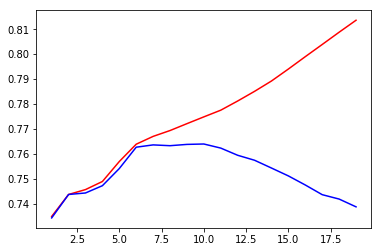

In [7]:
accuracy_train = []
accuracy_control = []
depth = []
for current_depth in range(1, 20):
    depth.append(current_depth)
    
    #Модифицируйте создание классификатора передав ему нужное значение максимальной высоты

    
    model = DecisionTreeClassifier(max_depth=current_depth, random_state=31337)
    model.fit(train_data, train_target)
    train_predictions = model.predict(train_data)
    control_predictions = model.predict(control_data)
    accuracy_train.append(accuracy_score(train_predictions, train_target))
    accuracy_control.append(accuracy_score(control_predictions, control_target))
    print("max_depth: {}, train_score:{}, control_score:{}"\
                 .format(current_depth, accuracy_train[-1], accuracy_control[-1])
         )

    

plt.plot(depth, accuracy_train, color='red')
plt.plot(depth, accuracy_control, color='blue')


# Задание №2
Это задание с кросс-проверкой (студенты проверяют студентов)
Как вы думаете, почему с увеличением высоты дерева качество предсказаний на тренировочной выборке (красный график) всегда растет, а на контрольной сначала растет, а потом начинает падать?

Ответ введите в системе EdX